# Cuaderno de Predicción Portable (Uso de .keras)
Este notebook carga un modelo de Red Neuronal Convolucional ya entrenado (un archivo .keras) y lo utiliza directamente para clasificar nuevas imágenes que uno suba de forma interactiva.

# 1 . Configuración y Carga del Modelo

Nos conectamos a Google Drive e importamos las librerías. Luego, cargamos el modelo .keras guardado y definimos manualmente los nombres de las clases

In [ ]:
# CELDA 1: IMPORTACIÓN DE LIBRERÍAS
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import drive
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image

In [ ]:
# CELDA 2: CONEXIÓN CON GOOGLE DRIVE
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# CELDA 3: CARGA DEL MODELO ENTRENADO

# 1. Ruta que apunte al archivo .keras guardado
model_path = '/content/drive/MyDrive/clasificador_espacios.keras'

# 2. Definir los nombres de las clases EXACTAMENTE en el mismo orden que durante el entrenamiento
class_names = ['limpio', 'reparacion', 'sucio']
image_height = 32
image_width = 32

# Cargar el modelo que reemplaza todo el entrenamiento
model = load_model(model_path)

print("✅ Modelo cargado exitosamente.")
print("Clases definidas:", class_names)

✅ Modelo cargado exitosamente.
Clases definidas: ['limpio', 'reparacion', 'sucio']


# 2 . Prueba Interactiva del Modelo

Ejecutamos la siguiente celda y aparecerá un botón para que uno pueda subir una o más imágenes desde la computadora. Luego, el código las procesará y mostrará la predicción para cada una.

Carga una o más imágenes para clasificar:


Saving pasillo-r2.png to pasillo-r2.png

Analizando archivo: "pasillo-r2.png"
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


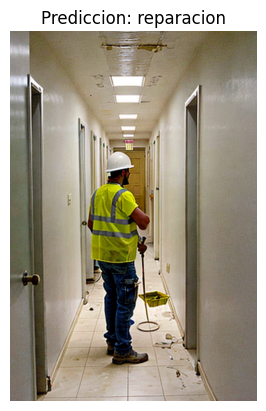

In [ ]:
# CELDA 4: PRUEBA INTERACTIVA DEL MODELO

print("Carga una o más imágenes para clasificar:")
# Mostramos el boton de carga de Colab
uploaded = files.upload()

# Procesamos cada archivo subido
for fn in uploaded.keys():
    print(f'\nAnalizando archivo: "{fn}"')

    # 1. Cargar para predecir (redimensionada a 32x32)
    img_pred = tf.keras.utils.load_img(
        io.BytesIO(uploaded[fn]),
        target_size=(image_height, image_width) # Redimensionar a 32x32
    )

    # Cargar original para mostrar (sin redimensionar)
    img_display = Image.open(io.BytesIO(uploaded[fn]))

    # 2. Preprocesar la imagen para el modelo
    x = tf.keras.utils.img_to_array(img_pred)   # Convertir a array
    x = x / 255.0                               # Normalizar (0-1)
    x = np.expand_dims(x, axis=0)               # Añadir dimension de lote (batch)

    # 3. Realizar la prediccion
    prediction = model.predict(x)

    # 4. Interpretar resultados
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]

    # 5. Visualizar
    plt.imshow(img_display) # Mostramos la imagen original
    plt.title(f'Prediccion: {predicted_class}')
    plt.axis('off')
    plt.show()